In [18]:
import pickle
import pandas as pd
pd.set_option('max_colwidth',100)
import matplotlib.pyplot as plt
from textblob import TextBlob

In [22]:
# Load in the files 
infile = open('data_files/comedian_corpus','rb')
data = pickle.load(infile)
infile.close()
data.head()

infile = open('data_files/comedian_dtm','rb')
dtm = pickle.load(infile)
infile.close()
dtm.head()

infile = open('data_files/stop_words','rb')
stop_words = pickle.load(infile)
infile.close()
data = data.drop(columns=['vocab_size','total_words','total_words_dtm','wpm_dtm','wpm'])

# Sentiment Analysis
To perform our sentiment analysis we'll be using TextBlob, which assigns polarity and subjectivity to our text using the words in our text and the order they come in. Therefore we need to use our corpus as it contains our text in full.

In [23]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['sketch_text'].apply(pol)
data['subjectivity'] = data['sketch_text'].apply(sub)


In [30]:
data.head(15)

,sketch_text,run_time,IMBD_rating,IMBD_ratings_number,year_released,show_num,comedian,show_name,polarity,subjectivity
Bo Burnham - Words Words Words,thank you when i say hey you say ho hey ho hey ho thats basically how hitler rose to power my sh...,63,8.2,2731,2010,1,Bo Burnham,Words Words Words,0.057932,0.567531
Bo Burnham - What,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort ...,60,8.5,7555,2013,2,Bo Burnham,What,0.072299,0.553982
Bo Burnham - Make Happy,that has been really a difficult thing for me my mother has always been a very difficult person ...,60,8.4,9087,2016,3,Bo Burnham,Make Happy,0.060964,0.549917
John Mulaney - New in Town,new in town john mulaneys new in town hes spilling mustard on his shirt hes got some papers to d...,60,8.3,5735,2012,1,John Mulaney,New in Town,0.052007,0.499356
John Mulaney - Comeback Kid,armed with boyish charm and a sharp wit the former snl writer john mulaney offers sly takes on m...,62,8.0,7352,2015,2,John Mulaney,Comeback Kid,0.072650,0.482888
John Mulaney - Kid Gorgeous,welcome to radio city music hall its time any questions no walk with me good evening hi im john ...,65,8.0,6581,2018,3,John Mulaney,Kid Gorgeous,0.071479,0.477671
Ricky Gervais - Politics,the houses of parliament home to british politics but you dont need to come here to see politics...,68,7.8,3302,2004,1,Ricky Gervais,Politics,0.039169,0.502089
Ricky Gervais - Science,spooky voice long ago in a castle laboratory sort of like frankensteins you know science turned ...,86,7.8,2052,2010,2,Ricky Gervais,Science,0.057708,0.497963
Ricky Gervais - Humanity,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely...,79,8.0,15736,2018,3,Ricky Gervais,Humanity,0.054060,0.508054
Kevin Bridges - Story So Far,im at the crossroads \n getting drowned in white lines a bad moon is rising \n but now im doing ...,120,7.8,292,2010,1,Kevin Bridges,Story So Far,0.080324,0.505150


Text(0, 0.5, '<-- Facts -------- Opinions -->')

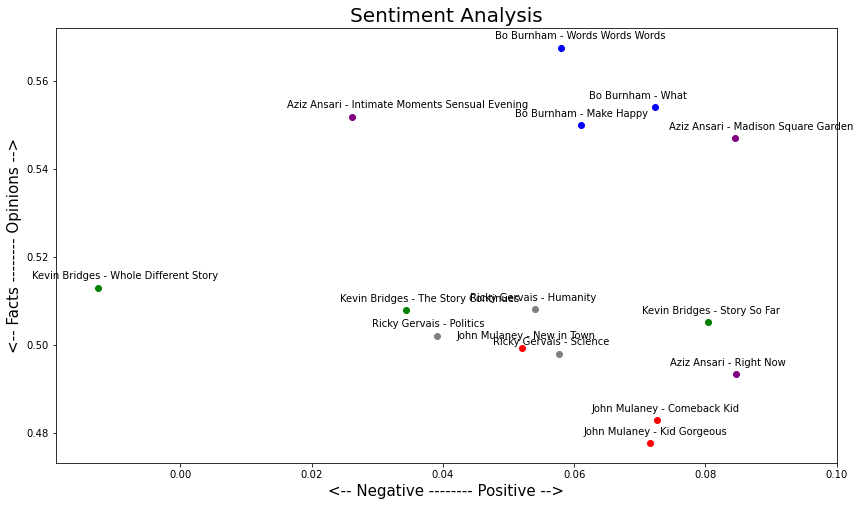

In [42]:
palette = ['Blue','Red','Green']
hue  = ['First Show','Second Show','Third Show']

plt.figure(figsize = (14,8))
color = ['Blue','Blue','Blue','Red','Red','Red','Grey','Grey','Grey','Green','Green','Green','Purple','Purple','Purple']
count = 0
for graph_iter in data.index:   
    x = data.polarity.loc[graph_iter]
    y = data.subjectivity.loc[graph_iter]
    plt.scatter(x, y, color=color[count])
    plt.text(x-.01, y+.002, graph_iter, fontsize=10)
    plt.xlim(-.019, .1)
    count +=1

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

In [ ]:
palette = ['Blue','Red','Green']
hue  = ['First Show','Second Show','Third Show']

plt.figure(figsize = (14,8))
plt.legend(title = 'Comedian')
count = 0
comedians = data.comedian.unique()
for graph_iter in comedians:
    if count == 3: 
        plt.subplot(2, 2, count + 1)
        graph = sns.scaterplot(x = data.show_num, y = data[graph_iter], hue = hue, palette = palette,
                             marker = 'o', legend=True)
        handles, labels = graph.get_legend_handles_labels()
        graph.legend(handles=handles, labels=labels, title='Comedian', bbox_to_anchor=(1.1, 1.5), loc='upper left', prop={'size': 15})
        plt.setp(graph.get_legend().get_title(), fontsize='20')
        graph.set(xlabel = 'Show Order', ylabel = Titles[count])
        break
    plt.subplot(2, 2, count + 1)
    graph = sns.scatterplot(x = data, y = data[graph_iter], hue = hue, palette = palette, 
                         marker = 'o', legend = False)
    graph.set(xlabel = 'Show Order', ylabel = Titles[count])
    count +=1
    
    
for graph_iter in data.index:   
    x = data.polarity.loc[graph_iter]
    y = data.subjectivity.loc[graph_iter]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['comedian'][graph_iter], fontsize=10)
    plt.xlim(-.01, .12)